<a href="https://colab.research.google.com/github/RachitBansal/Power-Forecasting/blob/master/ALL_MODEL_COMPARISON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
import os
from keras.models import load_model,Sequential 
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error

Using TensorFlow backend.


In [3]:

print("Enter no of equipments : ")
num_points  = int(input())

Enter no of equipments : 
9


In [0]:
cnn_lstm_path = "My Drive/Greend"
lstm_path = "My Drive/Greend/Saved_weights/LSTM_weights"
ann_path = "My Drive/Greend/Saved_weights/ANN_weights"

In [5]:
os.listdir("My Drive/Greend/Saved_weights")

['LSTM_weights', 'ANN_weights', 'CNN_LSTM_weights']

In [0]:
cnnlstm = os.listdir(cnn_lstm_path)
lstm = os.listdir(lstm_path)
ann = os.listdir(ann_path)

In [7]:
Cnn = []
Lstm  =[]
Ann = []
for i in range(9):
    model1=load_model(cnn_lstm_path+'/weights{}_model_1.h5'.format(i))
    model2=load_model(lstm_path+'/{}_model_1.h5'.format(i))
    model3=load_model(ann_path+'/{}_model_1.h5'.format(i))
    Cnn.append(model1)
    Lstm.append(model2)
    Ann.append(model3)












Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
def load_data(path):
    x_test = []
    y_test = []
    for i in range(num_points):
        filenamex = path+"/xt_greend_eq{}.npy".format(i)
        filenamey = path+"/yt_greend_eq{}.npy".format(i)
        x_temp = np.load(filenamex)/300
        y_temp = np.load(filenamey)/300
        lent = x_temp.shape[0]
        lent = int(0.8*lent)
        x_temp = x_temp[:lent]
        y_temp = y_temp[:lent]
        x_test.append(x_temp)
        y_test.append(y_temp)
    return x_test,y_test    

In [18]:
print("Enter the number of points for Predictions and graphs : ")
points = int(input())

Enter the number of points for Predictions and graphs : 
30


In [0]:
x_test,y_test = load_data(cnn_lstm_path)

In [0]:
def all_model_graphs(eq):
    i = eq
    cnnpred = Cnn[i].predict(x_test[i][:points].reshape(points,128,1)).reshape(-1,)
    lstmpred = Lstm[i].predict(x_test[i][:points].reshape(points,128,1)).reshape(-1,)
    annpred = Ann[i].predict(x_test[i][:points].reshape(-1,128)).reshape(-1,)
    ensemblepred = np.load(cnn_lstm_path+"/results_ensemble{}_model_500.npy".format(i))
    ensemblepred = ensemblepred[:points].reshape(-1)
    realpoints = y_test[i][:points].reshape(-1,)
    try:
        arimapred = np.load(cnn_lstm_path+"/ARIMA_RESULT_eq{}.npy".format(i))
        arimapred = arimapred[:points]
    except:
        print("ARIMA reading not present!!!!!!!")
    print("Graph of equipment {} : \n".format(i+1))
    try:
        plt.plot(arimapred,label  = "arima")
    except:
        None
    plt.plot(cnnpred,label = "cnn-lstm")
    plt.plot(lstmpred,label = "lstm")
    plt.plot(annpred,label = "ann")
    plt.plot(ensemblepred,label = "ensemble")
    plt.plot(realpoints,label = "Actual Values")
    plt.legend()
    plt.show()

    print("Metrics of equipment {} : \n\n".format(i+1))
    print("CNN_LSTM: \n")
    error = mean_squared_error(realpoints, cnnpred)
    print('Test MSE: %.3f' % error)
    print("RMSE : %.3f"%(np.sqrt(error)))
    print("MAE : %.3f"%(mean_absolute_error(realpoints,cnnpred)))
        
    print("\n\nLSTM: \n")
    error = mean_squared_error(realpoints, lstmpred)
    print('Test MSE: %.3f' % error)
    print("RMSE : %.3f"%(np.sqrt(error)))
    print("MAE : %.3f"%(mean_absolute_error(realpoints,lstmpred)))

    print("\n\nANN: \n")
    error = mean_squared_error(realpoints, annpred)
    print('Test MSE: %.3f' % error)
    print("RMSE : %.3f"%(np.sqrt(error)))
    print("MAE : %.3f"%(mean_absolute_error(realpoints,annpred)))

    print("\n\nENSEMBLE : \n")
    error = mean_squared_error(realpoints, ensemblepred)
    print('Test MSE: %.3f' % error)
    print("RMSE : %.3f"%(np.sqrt(error)))
    print("MAE : %.3f"%(mean_absolute_error(realpoints,ensemblepred)))
    try:
        print("\n\nARIMA : \n")
        error = mean_squared_error(realpoints,arimapred)
        print('Test MSE: %.3f' % error)
        print("RMSE : %.3f"%(np.sqrt(error)))
        print("MAE : %.3f"%(mean_absolute_error(realpoints,arimapred)))
    except:
        None


Graph of equipment 1 : 



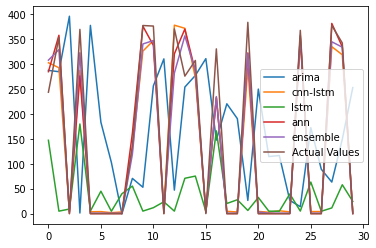

Metrics of equipment 1 : 


CNN_LSTM: 

Test MSE: 1615.965
RMSE : 40.199
MAE : 25.321


LSTM: 

Test MSE: 39946.565
RMSE : 199.866
MAE : 138.547


ANN: 

Test MSE: 1268.352
RMSE : 35.614
MAE : 18.593


ENSEMBLE : 

Test MSE: 1281.254
RMSE : 35.795
MAE : 21.351


ARIMA : 

Test MSE: 53374.278
RMSE : 231.029
MAE : 195.696


In [21]:
all_model_graphs(0)